In [1]:
import jax.numpy as np
from jax import grad, jit, vmap
from jax import random
import matplotlib.pyplot as plt
import matplotlib as mpl
from jax.scipy.stats import norm

from svgd import svgd, kernel_param_update_rule

vkernel_param_update_rule = vmap(kernel_param_update_rule, 1) # for multidim case
key = random.PRNGKey(0)

/home/lauro/.virtualenvs/msc-thesis/lib/python3.6/site-packages/jax/lib/xla_bridge.py:122: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [2]:
@jit
def logp(x):
    """
    Parameters: 
    * x: np array of shape (d,)
    
    Returns: 
    * scalar log(p(x)), where p(x) is multidim gaussian
    """
    out = np.sum(norm.logpdf(x, loc=1, scale=1))
    return np.squeeze(out) # to be able to take a gradient, output must be scalar

# Generate data

In [3]:
n = 100
stepsize = 0.001
L = int(1 / stepsize)

# generate data
x0 = random.normal(key, (n,1)) - 10

In [4]:
kernel_param_update_rule(x0)

DeviceArray([0.1748488], dtype=float32)

# 1-dim

In [5]:
# @jit
# def logp(x):
#     """
#     Parameters: 
#     * x: np array of shape (d,)
    
#     Returns: 
#     * scalar log(p(x)), where p(x) is multidim gaussian
#     """
#     mean = 0
#     sigma = 1
#     out = np.prod(norm.logpdf(x, loc=mean, scale=sigma))
#     return np.squeeze(out) # to be able to take a gradient, output must be scalar

In [6]:
xout1, log1 = svgd(x0, logp, stepsize, L, kernel_param=None, kernel_param_update_rule=kernel_param_update_rule)

# d-dim

In [7]:
xout2, log2 = svgd(x0, logp, stepsize, L, kernel_param=None, kernel_param_update_rule=kernel_param_update_rule)

# plotting

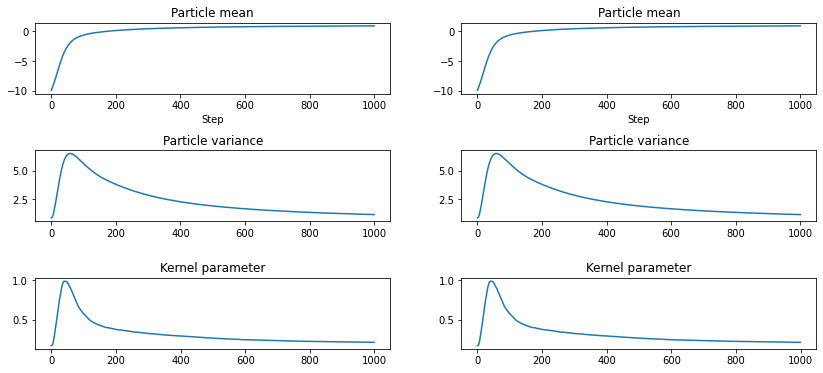

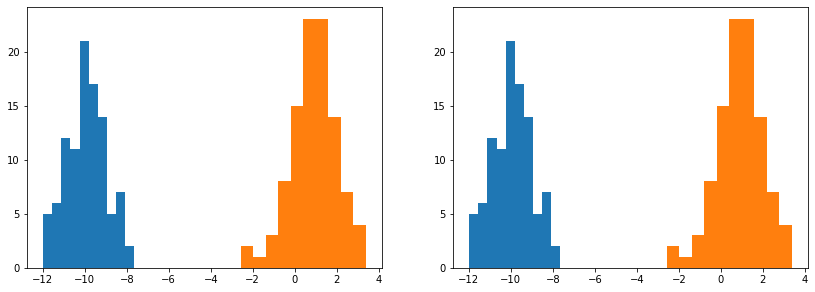

In [8]:
mpl.rcParams['figure.figsize'] = [14.0, 6.0]
plt.figure(1)
plt.subplots_adjust(hspace=0.8)

####### first
log = log1

plt.subplot(321) # 3 plots on 0th axis, 2 plots on 1th axis, plot nr 1 --> 321
plt.title("Particle mean")
plt.plot(log["particle_mean"])
plt.xlabel("Step")

plt.subplot(323)
plt.title("Particle variance")
plt.plot(log["particle_var"])

plt.subplot(325)
plt.title("Kernel parameter")
plt.plot(log["kernel_params"])


####### second
log = log2

plt.subplot(322)
plt.title("Particle mean")
plt.plot(log["particle_mean"])
plt.xlabel("Step")

plt.subplot(324)
plt.title("Particle variance")
plt.plot(log["particle_var"])

plt.subplot(326)
plt.title("Kernel parameter")
plt.plot(log["kernel_params"])


####### plot data & histograms
mpl.rcParams['figure.figsize'] = [14.0, 4.8]
plt.figure(2)

xout = xout1
plt.subplot(121)
_ = plt.hist(x0[:, 0])
_ = plt.hist(xout[:, 0])

plt.subplot(122)
xout = xout2
_ = plt.hist(x0[:, 0])
_ = plt.hist(xout[:, 0])